# Statistical Analysis of COVID-19 in Maharashtra , India

A  District wise detailed statistical analysis of the COVID-19 in Maharashtra , India

The first case of the COVID-19 Pandemic in the Indian state of Maharashtra was confirmed on 9 March 2020.  Maharashtra confirmed around 22 thousand cases of the coronavirus (COVID-19) as of May 11, 2020, with 832 fatalities and 4,199 recoveries( and may have crossed 25K by now ). The country went into lockdown on March 25, the largest in the world, restricting 1.3 billion people. 
			
In this post, I will take a look at the current situation of Maharashtra and the district wise impact of the pandemic, we will also try to find out the what leads the pandemic to spread so rapidly Specifically in Maharashtra India. We will take a look at the regions which are most hampered by the outbreak and how numbers have steadily climbed in the different district.
			
To start off, we will import the necessary libraries which I will be using in my analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Next up,lets import the different data tables that I have gathered .

In [2]:
C_D = pd.read_csv('/home/vaibhav/Downloads/corona_district.csv')
M_D = pd.read_csv('/home/vaibhav/Downloads/maharastra population districtwise.csv')

Here I am using two different sources of data in this analysis. The first dataset is taken from the Covid-19 India Data by ZT API ( A free API that provides the Covid-19 data ), and the second dataset I downloaded from Kaggle thanks to saketh saraswathi.
			
You can download the datasets from my GitHub repository the link to which I have attached at the end of the post. Just remember to give the due credits though if you use them on the web!

Now let’s start by looking at the datasets
			
corona_district.csv

In [3]:
C_D.head()

,Unnamed: 0,name,notes,active,deceased,confirmed,recovered,newconfirmed
0,0,Ahmednagar,NaN,27,3,63,33,0
1,1,Akola,NaN,137,11,162,14,0
2,2,Amravati,NaN,49,13,83,21,0
3,3,Aurangabad,NaN,475,14,584,95,0
4,4,Beed,NaN,0,0,1,1,0


Now  , we can see that the dataset corona_district.csv has the data regarding the total confirmed  , active , diseased ,  recovered and new confirmed  corona cases pr districts in Maharashtra 
 
maharashtra_Info_districtwise.csv

In [4]:
M_D.head()

,s.no,District,population_2011,population_2001,Area(sq km),literacy,Sex ratio(per 1000 boys)
0,1,Thane,"11,060,148","8,131,849","9,558",84.53 %,886
1,2,Pune,"9,429,408","7,232,555","15,643",86.15 %,915
2,3,Mumbai Suburban,"9,356,962","8,640,419",446,89.91 %,860
3,4,Nashik,"6,107,187","4,993,796","15,530",82.31 %,934
4,5,Nagpur,"4,653,570","4,067,637","9,892",88.39 %,951


Here in the maharashtra_Info_districtwise.csv, we have the district-wise statistics like population, area, literacy ... etc. This data set will be our key point in order to understand the main reason behind the spread of the COVID -19 in Maharashtra with such a high extent
By understanding these datasets we will be able to answer the following questions :
                
- do the population and population density affect corona spread ?
- Does the district with high literacy percentage has less corona spread?

Now let’s start our analysis based on these datasets

# district wise figure 

lets first visualize the district wise corona count to get some intuition about the condition 

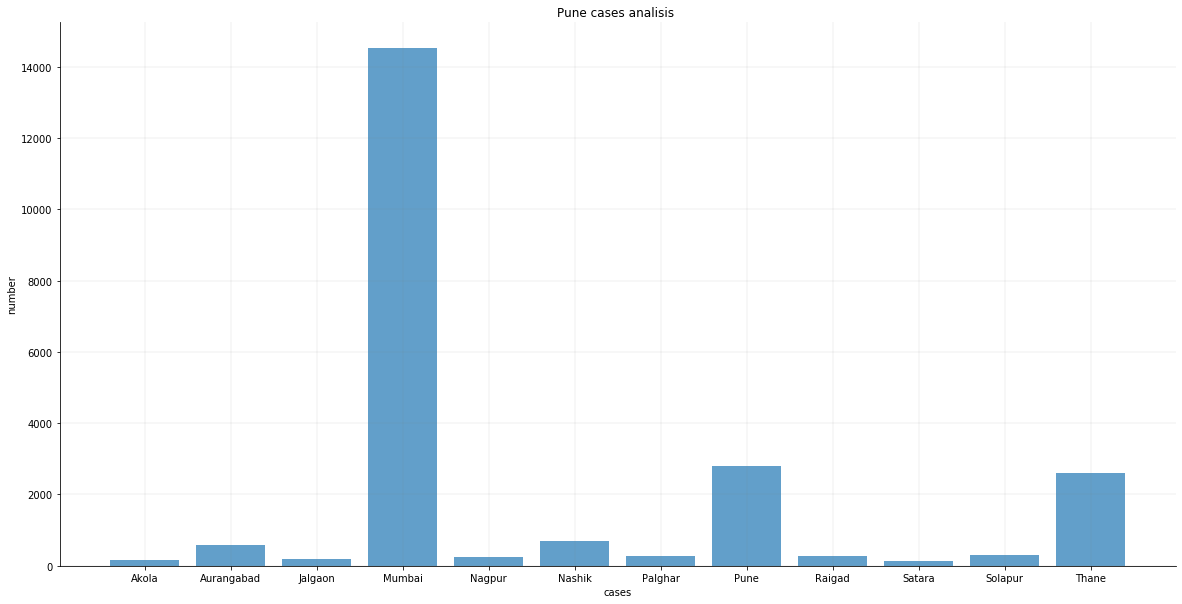

In [8]:
df = C_D.loc[C_D['confirmed'] > 100] # We are just taking Districts with more than 100 covid cases for visulization only 
def barplot(df, x_dim, y_dim ):
  x = df[x_dim]
  y = df[y_dim]
  fig, ax = plt.subplots(figsize=(20, 10))
  #applies the custom color map along with the color sequence
  ax.bar(x, y, alpha=0.70 )
  #adds a title and axes labels
  ax.set_title('Pune cases analisis ')
  ax.set_xlabel('cases')
  ax.set_ylabel('number')
  #removing top and right borders
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()
barplot(df, 'name' ,'confirmed')

From this plot it is pretty clear that Mumbai has taken by corona( more than 50% of the cases in Maharashtra ), it has  "community spread",  because of such high count it may hamper the analysis so we will remove it from the final dataset.

In [13]:
C_D.rename(columns = {'name':'District'}, inplace = True)
F_D = pd.merge(C_D,M_D, how='inner', on='District')

In [14]:
#F_D = F_D.drop(['s.no','Unnamed: 0' , 'notes','newconfirmed' ,'population_2001','Sex ratio(per 1000 boys)'] , axis = 1)

# Data Prepossessing :

Now we will combine these two datasets ( excluding Mumbai ).
The final dataset is :

In [15]:
F_D.head()

,Unnamed: 0,District,notes,active,deceased,confirmed,recovered,newconfirmed,s.no,population_2011,population_2001,Area(sq km),literacy,Sex ratio(per 1000 boys)
0,1,Akola,NaN,137,11,162,14,0,25,"1,813,906","1,630,239","5,676",88.05 %,946
1,2,Amravati,NaN,49,13,83,21,0,14,"2,888,445","2,607,160","12,210",87.38 %,951
2,3,Aurangabad,NaN,475,14,584,95,0,10,"3,701,282","2,897,013","10,107",79.02 %,923
3,4,Beed,NaN,0,0,1,1,0,19,"2,585,049","2,161,250","10,693",76.99 %,916
4,5,Bhandara,NaN,1,0,1,0,0,31,"1,200,334","1,136,146","4,087",83.76 %,982


As it is pretty clear that the data set has some unwanted columns and it is in an improper format,  so we will do some data prepossessing
to make data more  workable:

In [16]:
F_D = F_D.drop(['s.no','Unnamed: 0' , 'notes','newconfirmed' ,'population_2001','Sex ratio(per 1000 boys)'] , axis = 1) # removing unwantad columns 

Now let’s change the values into workable numbers format

In [17]:
for value in F_D['population_2011'] :
    SS = str(value).split(',')
    r  = ''.join(SS)
    F_D = F_D.replace(to_replace =  value , 
                 value = float(r))

for value in F_D['Area(sq km)'] :
    SS = str(value).split(',')
    r  = ''.join(SS)
    F_D = F_D.replace(to_replace =  value , 
                 value = float(r))

for value in F_D['literacy'] :
    SS = str(value).split('%')
    r  = SS[0]
    F_D = F_D.replace(to_replace =  value , 
                 value = float(r))

As we have modified most of the data fields, now its time to look at the data set

In [18]:
F_D.head()

,District,active,deceased,confirmed,recovered,population_2011,Area(sq km),literacy
0,Akola,137,11,162,14,1813906.0,5676.0,88.05
1,Amravati,49,13,83,21,2888445.0,12210.0,87.38
2,Aurangabad,475,14,584,95,3701282.0,10107.0,79.02
3,Beed,0,0,1,1,2585049.0,10693.0,76.99
4,Bhandara,1,0,1,0,1200334.0,4087.0,83.76


Now it looks like something that we can work with. Let’s see what more we  can do to modify the dataset before directly starting visualizing the data

we will add some new column and normalize the data

In [19]:
F_D['Density'] = F_D['population_2011'] / F_D['Area(sq km)']

In [20]:
 def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if (feature_name == 'District'):
          result[feature_name] = df[feature_name]
          continue
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

F_D = normalize(F_D)
F_D.head()

,District,active,deceased,confirmed,recovered,population_2011,Area(sq km),literacy,Density
0,Akola,0.069744,0.069620,0.057747,0.012891,0.094438,0.137504,0.985839,0.157346
1,Amravati,0.025590,0.082278,0.029412,0.019337,0.199676,0.702925,0.957934,0.073833
2,Aurangabad,0.239338,0.088608,0.209110,0.087477,0.279284,0.520942,0.609746,0.204263
3,Beed,0.001004,0.000000,0.000000,0.000921,0.169962,0.571651,0.525198,0.079052
4,Bhandara,0.001505,0.000000,0.000000,0.000000,0.034345,0.000000,0.807164,0.131310


# visualizing and Analyzing  the data



Now we are ready, Let’s start visualizing the data
			
First, we will find out the correlation between different entities with the no. of confirmed cases for all the districts in Maharashtra, it may have some relations with the spread of the coronavirus.

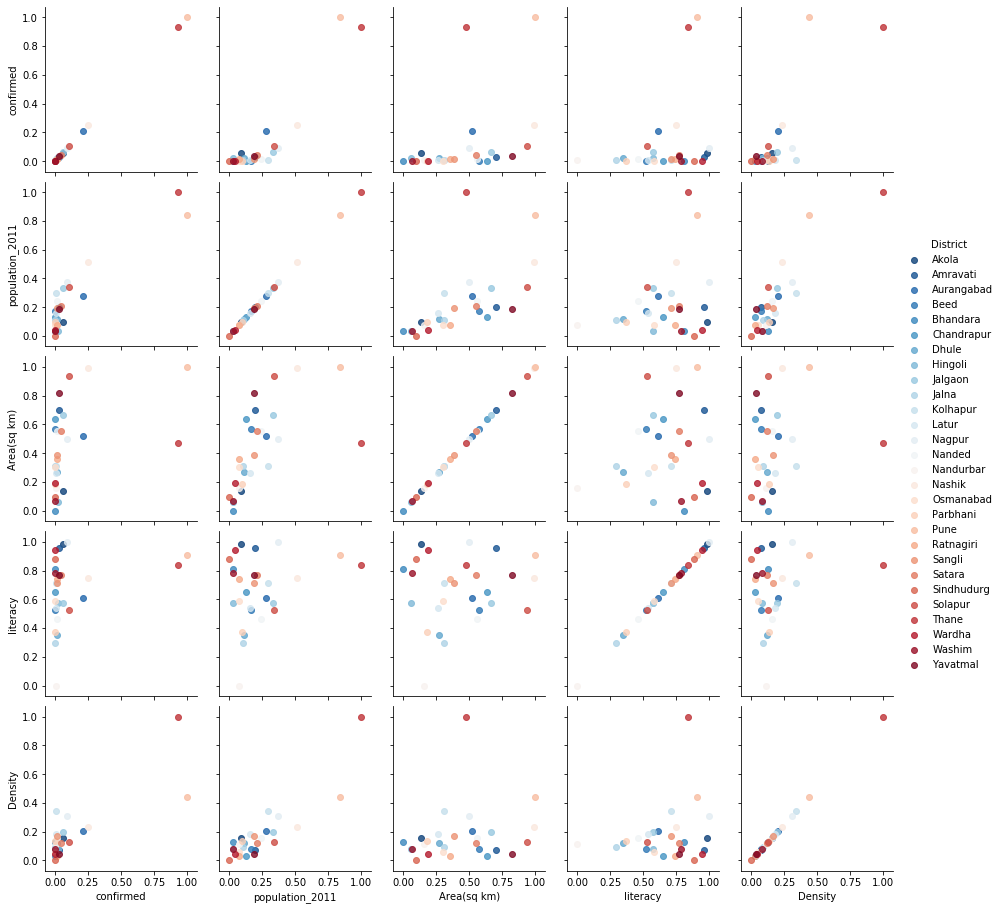

In [21]:
g = sns.PairGrid(F_D, vars=[ 'confirmed','population_2011', 'Area(sq km)',  'literacy', 'Density'],
                 hue='District', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

From this figure, we can see that how different entities in the dataset are related with each other but our region of interest is in the correlation of the no of confirmed cases in the different districts with the population, area, literacy, and density, now as we can see that each of them is showing some relation with the on. of confirmed cases, let’s dive deep into this and try to draw some conclusion out of it.
			
No. of confirmed cases in the district  versus the population of that district

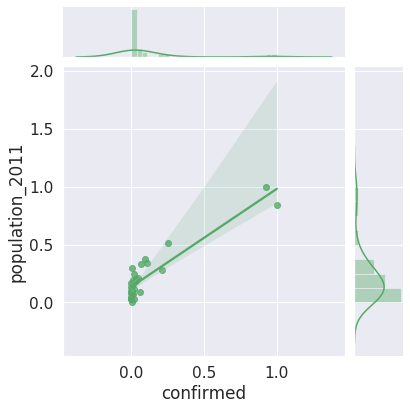

In [22]:
sns.set(font_scale=1.4)
sns.jointplot(data=F_D, x='confirmed', y='population_2011', kind='reg', color='g')
plt.show()

As we can see that the population and no of corona cases have some near-linear relation and if the coronavirus starts to spread in the high populated  district the this would be a difficult condition as we have one  example " MUMBAI CITY " ( highly populated City  )
			
As we have seen that the population plays an important role in the spread of the coronavirus now let’s try to find out  " If a district has a high population spread on the large area, then will it affect the corona spread? "
			
In short, let’s analyze the  No. of confirmed cases in the district  versus  population_Density of that district

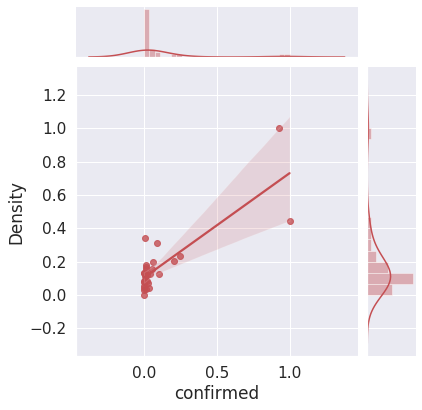

In [23]:
sns.jointplot(data=F_D, x='confirmed', y='Density', kind='reg', color='r')
plt.show()

Well, this turns out to be nearly the same as the population curve but with the minute changes. As we can see that the density curve has higher slop than the population curve, this means that if the district has high population density then there is a high chance of widespread of coronavirus in that district
			
this concludes our first Question, and also while taking actions against the spread of COVID, authorities should focus more on Districts with a high population and high population density. To protect such districts should be our first priority.
			
Now let’s look at the second question.
We will analyze this data and try to draw some conclusion out off it
			
No. of confirmed cases in the district versus  literacy rate of that district

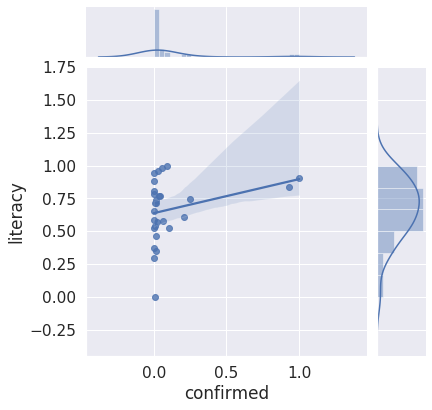

In [24]:
sns.jointplot(data=F_D, x='confirmed', y='literacy', kind='reg', color='b')
plt.show()

Now it’s pretty clear that it’s not showing bold relation between literacy rate and no. of confirmed cases, this is because fortunately, corona spread is less compared to the population of Maharashtra ( 11.42 crores ), but we can conclude some logical points out of this :
most of the districts with high corona count ( more than 0.15 in this plot ) showing on an average  good literacy rate
roughly districts with less literacy rate ( less than 0.6 ) have less corona spread
			
we can not directly say the relationship between the literacy rate and corona spread but somewhere
Alertness and being proactive  is more impotent than educational knowledge ( in order to stop corona spread )
Overall there are many factors that cause the corona spread but in order to study the role of such factors in spreading the virus,  we need more research and time. Eventually such kind of research is not only helpful for the current situation but also can lead the way in incoming crises.

# 